# HLS and Color Thresholds

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

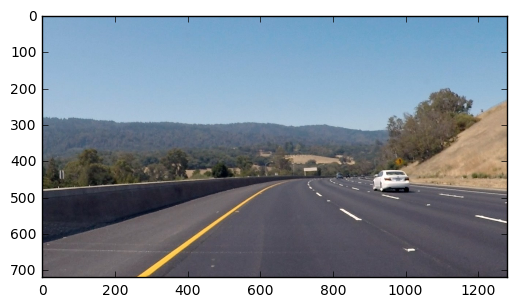

In [2]:
img = mpimg.imread("./curved-lane.jpg")
plt.imshow(img);

# Grayscale Thresholding

In [15]:
def get_grayscale_thresholded_img(img, thresh=(180, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    binary = np.zeros_like(gray)
    
    binary[(gray > threshold[0]) & (gray < threshold[1])] = 1
    
    return binary

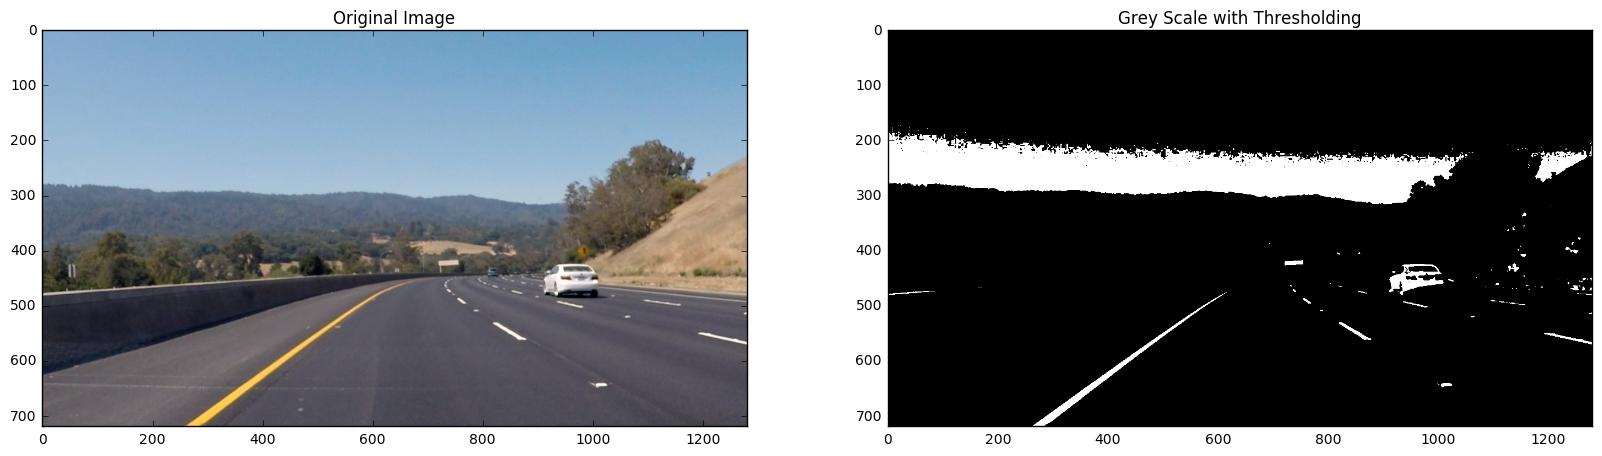

In [4]:
threshold = (180, 255)

binary = get_grayscale_thresholded_img(img, threshold)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(img);
ax1.set_title("Original Image");

ax2.imshow(binary, cmap="gray")
ax2.set_title("Grey Scale with Thresholding");

plt.show();

# Red Channel Thresholding

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:


In [16]:
def get_R_channel_thresholded_image(img, threshold=(200, 255)):
    R = img[:,:,0]
    
    binary = np.zeros_like(R)
    
    binary[(R >= thresh[0]) & (R <= thresh[1])] = 1
    
    return binary
    

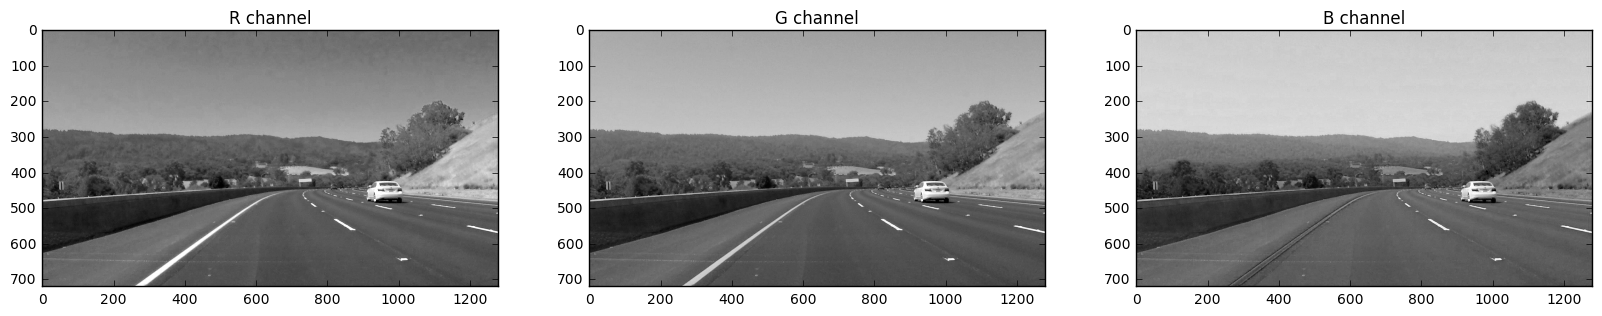

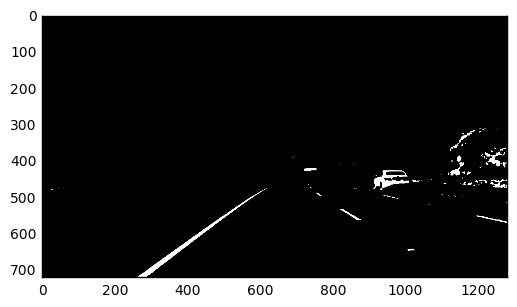

In [6]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(R, cmap="gray")
ax1.set_title("R channel")

ax2.imshow(G, cmap="gray")
ax2.set_title("G channel")

ax3.imshow(B, cmap="gray")
ax3.set_title("B channel")

plt.show()

thresh = (200, 255)
binary = get_R_channel_thresholded_image(img, threshold)

plt.imshow(binary, cmap="gray")
plt.show()


# HLS Thresholding 

- In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result

- The S channel picks up the lines well, so let's try applying a threshold there

- You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result

- From these examples, you can see that the S channel is probably your best bet, given that it's cleaner than the H result and doing a bit better than the R channel or simple grayscaling. But, it's not abundantly clear that one method is far superior to the others.

- In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement. Let's now look at the same thresholds applied to each of these four channels for this new image.

- Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

- It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

In [17]:
def get_HLS_channel_thresholded_image(img, channel, threshold=(90, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    binary = np.zeros_like(S)
    
    if(channel == 'S'):
        binary[(S >= threshold[0]) & (S <= threshold[1])] = 1
    elif(channel == 'H'):
        binary[(H >= threshold[0]) & (H <= threshold[1])] = 1
    elif(channel == 'L'):
        binary[(L >= threshold[0]) & (L <= threshold[1])] = 1
    
    return binary



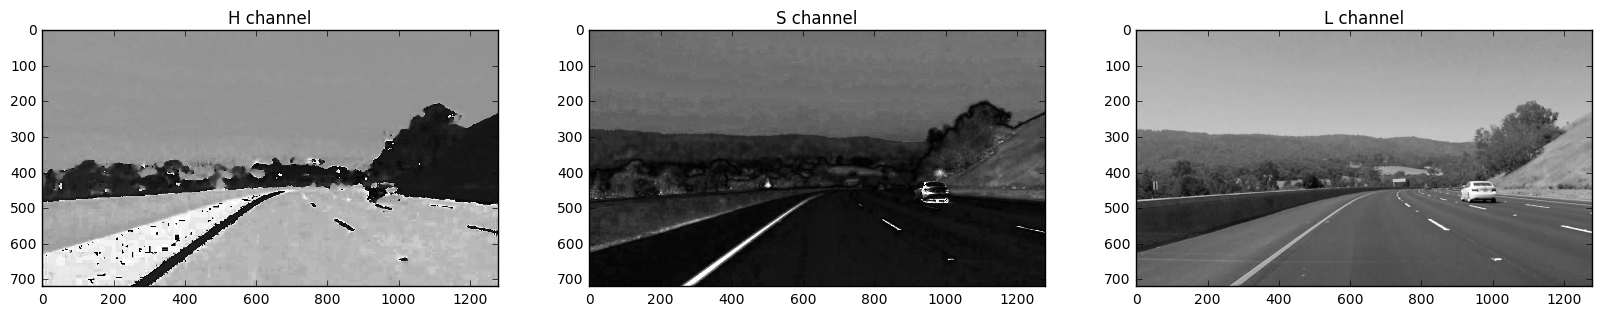

In [9]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.imshow(H, cmap="gray")
ax1.set_title("H channel")

ax2.imshow(S, cmap="gray")
ax2.set_title("S channel")

ax3.imshow(L, cmap="gray")
ax3.set_title("L channel")

plt.show()

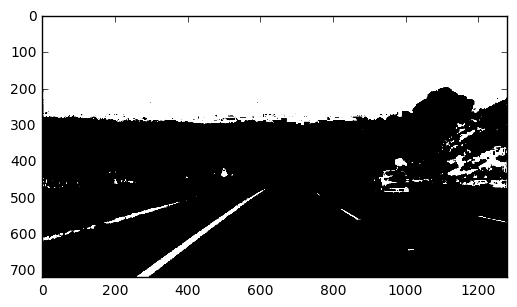

In [11]:
# - The S channel picks up the lines well, so let's try applying a threshold there:

thresh = (90, 255)
binary = get_HLS_channel_thresholded_image(img, 'S', thresh)
plt.imshow(binary, cmap="gray")
plt.show()

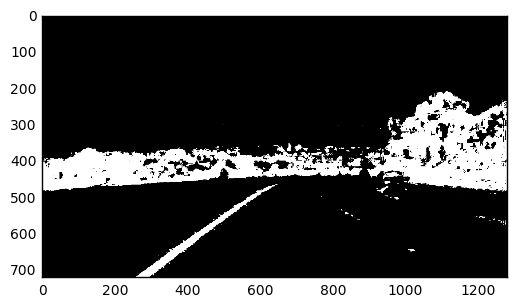

In [13]:
# You can also see that in the H channel, the lane lines appear dark, so we could try
# a low threshold there and obtain the following result:

threshold = (15, 100)
binary = get_HLS_channel_thresholded_image(img, "H", threshold)
plt.imshow(binary, cmap="gray");


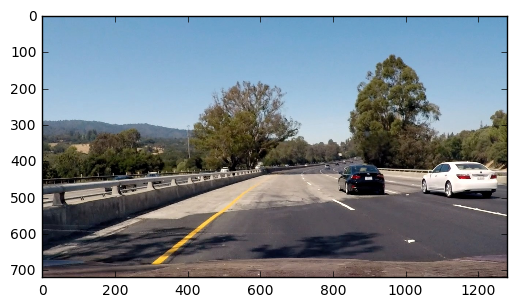

In [14]:
# Image with shadows

img = mpimg.imread("./shadow-lane.jpg")
plt.imshow(img);

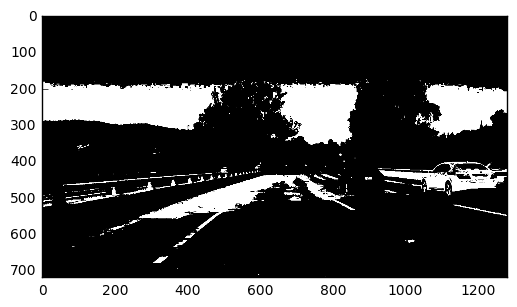

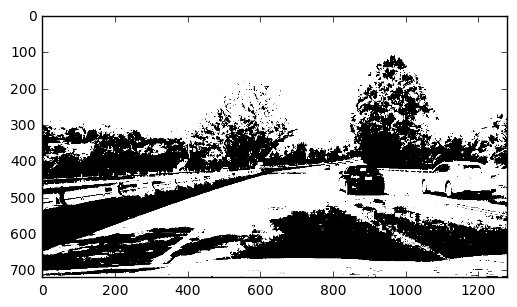

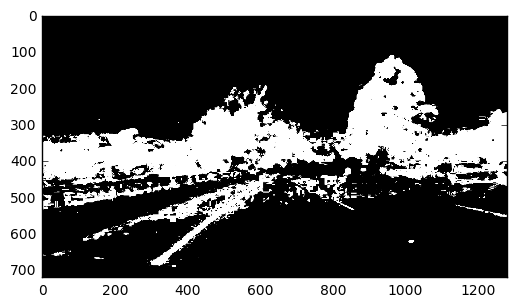

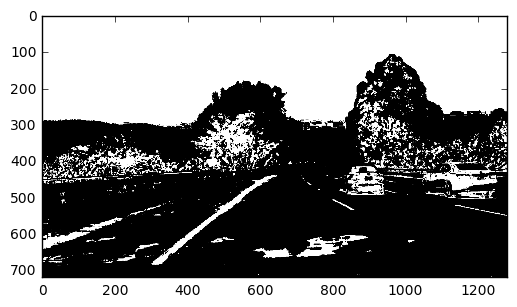

In [23]:
threshold = (180, 255)
gray_lanes = get_grayscale_thresholded_img(img, threshold)
plt.imshow(gray_lanes, cmap="gray")
plt.show()

red_lanes = get_R_channel_thresholded_image(img, threshold=(200, 255))
plt.imshow(red_lanes, cmap="gray")
plt.show()

h_channel_lanes = get_HLS_channel_thresholded_image(img, "H", threshold=(15, 100))
plt.imshow(h_channel_lanes, cmap="gray")
plt.show()

s_channel_lanes = get_HLS_channel_thresholded_image(img, "S", threshold=(90, 255))
plt.imshow(s_channel_lanes, cmap="gray")
plt.show()
